## Project Overview

X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead and also from past referrals. Once these leads are acquired the sales team makes the calls and send the mails to convert the leads into actual business.

#### Problem Statement
The problem is the lead conversion % is poor for ex out of 100 leads only 30% got converted. To come out of this situation and improve the conversion % by Identifying the Potential leads also known as "HOT LEADS".




The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.


#### Goals of the Case Study
There are quite a few goals for this case study:

    1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
    2. There are some more problems presented by the company which the model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model as we get in the first step. Also, make sure to include this in the final PPT where in the recommendations.


### The best Practices/The process to follow for this implementation is as below.

#####        Business Understanding
#####    1. Extract the Data 
#####    2. Understand the Data 
#####    3. Preprocessing the Data
#####    4. EDA
#####    5. Model Building
#####    6. Model Evaluation and Prediction

In [330]:
# Import the libraries required
import pandas as pd
import numpy as np

#Import the below two libraries for better visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#import the below sklearn libraries to work with the regression models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

# We can skip the warnings using the below code
import warnings
warnings.filterwarnings('ignore')



### 1. Extract the Data 

In [331]:
# Import or extract the Data

df = pd.read_csv('Leads.csv')
df.head()
pd.set_option('display.max_columns', None)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


### 2. Understanding the Data

In [332]:
# Validate the shape of the data
df.shape

(9240, 37)

In [333]:
# Let's check the Data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [334]:
#validate the categorical and numerical values
categorical_col = df.select_dtypes(exclude =["number"]).columns.values
numerical_col = df.select_dtypes(include =["number"]).columns.values
print("Categorical Features : \n {} \n\n".format(categorical_col))
print("Numerical Features : \n {} ".format(numerical_col))

Categorical Features : 
 ['Prospect ID' 'Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call'
 'Last Activity' 'Country' 'Specialization'
 'How did you hear about X Education' 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses' 'Tags' 'Lead Quality'
 'Update me on Supply Chain Content' 'Get updates on DM Content'
 'Lead Profile' 'City' 'Asymmetrique Activity Index'
 'Asymmetrique Profile Index' 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview' 'Last Notable Activity'] 


Numerical Features : 
 ['Lead Number' 'Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit' 'Asymmetrique Activity Score'
 'Asymmetrique Profile Score'] 


In [335]:
# validate the statistical metrics of data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


### Checking  Null values

In [336]:
# Check data for the null values rounding to 2 decimals to find the % missing values

total_val = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage_total = pd.DataFrame(round(df.isnull().mean()*100,2).sort_values(ascending=False),columns=['Percentage'])
df_null = pd.concat([total_val, percentage_total], axis = 1)

In [337]:
# Extract the columns only missing more than 20%

df_null[(round(df.isnull().mean()*100, 2))>1]

,Total,Percentage
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


<Axes: >

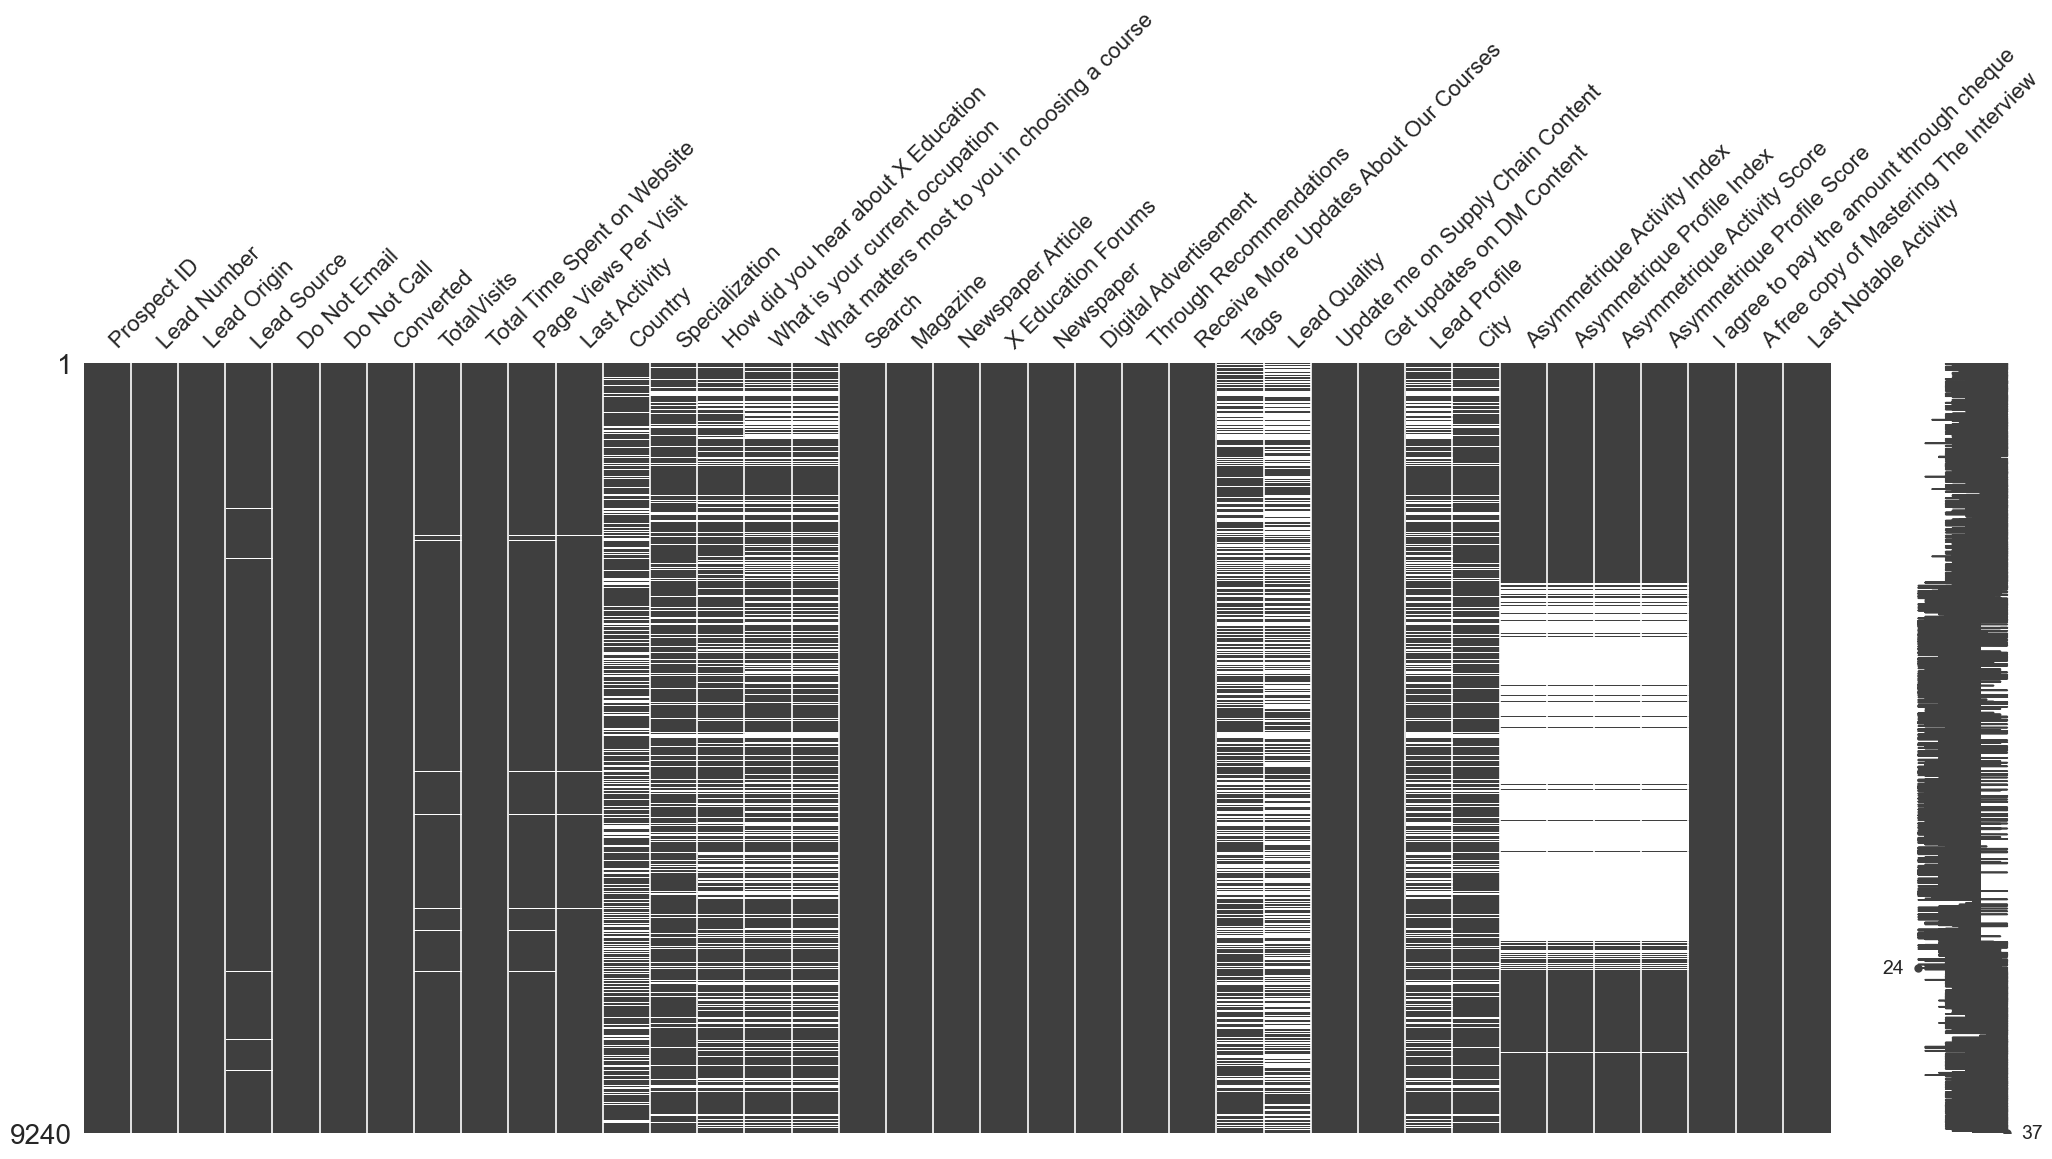

In [338]:
msno.matrix(df)

###### The above columns have missing data. We need to clearly check Intuitively if these columns are needed to fill the missing  info or not? If need to fill which Strategy to use mean/median or mode? else we need to drop the columns which are having missing values >40%

### Drop or handle the null or unwanted columns

In [339]:
# Check the only single unique value columns
ls = ['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
      'Through Recommendations','A free copy of Mastering The Interview', 'Magazine','Receive More Updates About Our Courses',
     'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [340]:
for col in ls:
    if col in df.columns:
        print(f"Value counts for column: {col}")
        print(df[col].value_counts())
        print("\n" + "-"*50 + "\n")
    else:
        print(f"Column '{col}' not found in DataFrame.")

Value counts for column: Search
Search
No     9226
Yes      14
Name: count, dtype: int64

--------------------------------------------------

Value counts for column: Newspaper Article
Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64

--------------------------------------------------

Value counts for column: X Education Forums
X Education Forums
No     9239
Yes       1
Name: count, dtype: int64

--------------------------------------------------

Value counts for column: Newspaper
Newspaper
No     9239
Yes       1
Name: count, dtype: int64

--------------------------------------------------

Value counts for column: Digital Advertisement
Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64

--------------------------------------------------

Value counts for column: Through Recommendations
Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64

--------------------------------------------------

Value counts for column: A free 

In [341]:
#Remove columns which has only one unique value

"""
The following columns have only 1 values and doesn't help in predicting the potential leads. Hence we willdrop them
Magazine
Receive More Updates About Our Courses
Update me on Supply Chain Content
Get updates on DM Content
I agree to pay the amount through cheque

"""   
df= df.loc[:,df.nunique()!=1] # we are chosing only the columns with more than one unique value.
df.shape

(9240, 32)

In [342]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [343]:
#lets drop the unwanted columns
col_unwanted = ['Prospect ID','Asymmetrique Activity Score','Asymmetrique Profile Score', 'Search','Newspaper Article',
                'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']

df = df.drop(columns = col_unwanted)
df.shape

(9240, 23)

In [344]:
df.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,No,Modified
1,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,Ringing,NaN,Select,Select,02.Medium,02.Medium,No,Email Opened


### Let's handle the Missing values or improper "select" values as we see more in the data

    The columns Specialization, How did you hear about X Education, Lead Profile, City are having the values like 'Select'.
    which has no meaning hence we can rename those either Other or Unknown.And we also need to fillna with either unknown/other


#### Handling missing Values

In [345]:
cols_mis_val = ['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Tags','Lead Profile',
                'What is your current occupation','Country','How did you hear about X Education','Specialization', 'City', 'What matters most to you in choosing a course']


In [346]:
#For the columns defined above we will impute the values which has 'Select' with Unknown

for col in cols_mis_val:
    if col in df.columns:
        df[col].replace('Select', 'Unknown', inplace=True)

In [347]:
#For the columns defined above we will impute the values which has 'NaN' with Unknown

for col in cols_mis_val:
    if col in df.columns:
        df[col].fillna('Unknown', inplace=True)

In [348]:
# For the continuous variables like TotalVisits, Page views Per Visit let's impure missing values with Median

mis_num_val = ['TotalVisits', 'Page Views Per Visit']

for col in mis_num_val:
    df[col].fillna(df[col].median(), inplace=True)

In [349]:
df.isnull().mean()

Lead Number                                     0.00
Lead Origin                                     0.00
Lead Source                                     0.00
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     0.00
Total Time Spent on Website                     0.00
Page Views Per Visit                            0.00
Last Activity                                   0.01
Country                                         0.00
Specialization                                  0.00
How did you hear about X Education              0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Tags                                            0.00
Lead Quality                                    0.00
Lead Profile                                    0.00
City                                          

In [350]:
df['Country'].value_counts()

Country
India                   6492
Unknown                 2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [351]:
df['Country'] = df['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
df['Country'].value_counts()

Country
India            6492
Outside India    2748
Name: count, dtype: int64

In [352]:
df.shape

(9240, 23)

#### Now the dataset is not having any null values and is good to go further analysis

### Exploratory Data Analysis

#### Univariate Analysis

In this let's check the each feature how it is distributed

In [353]:
df.head(3)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,Outside India,Unknown,Unknown,Unemployed,Better Career Prospects,Interested in other courses,Low in Relevance,Unknown,Unknown,02.Medium,02.Medium,No,Modified
1,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Unknown,Unknown,Unemployed,Better Career Prospects,Ringing,Unknown,Unknown,Unknown,02.Medium,02.Medium,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Unknown,Student,Better Career Prospects,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes,Email Opened


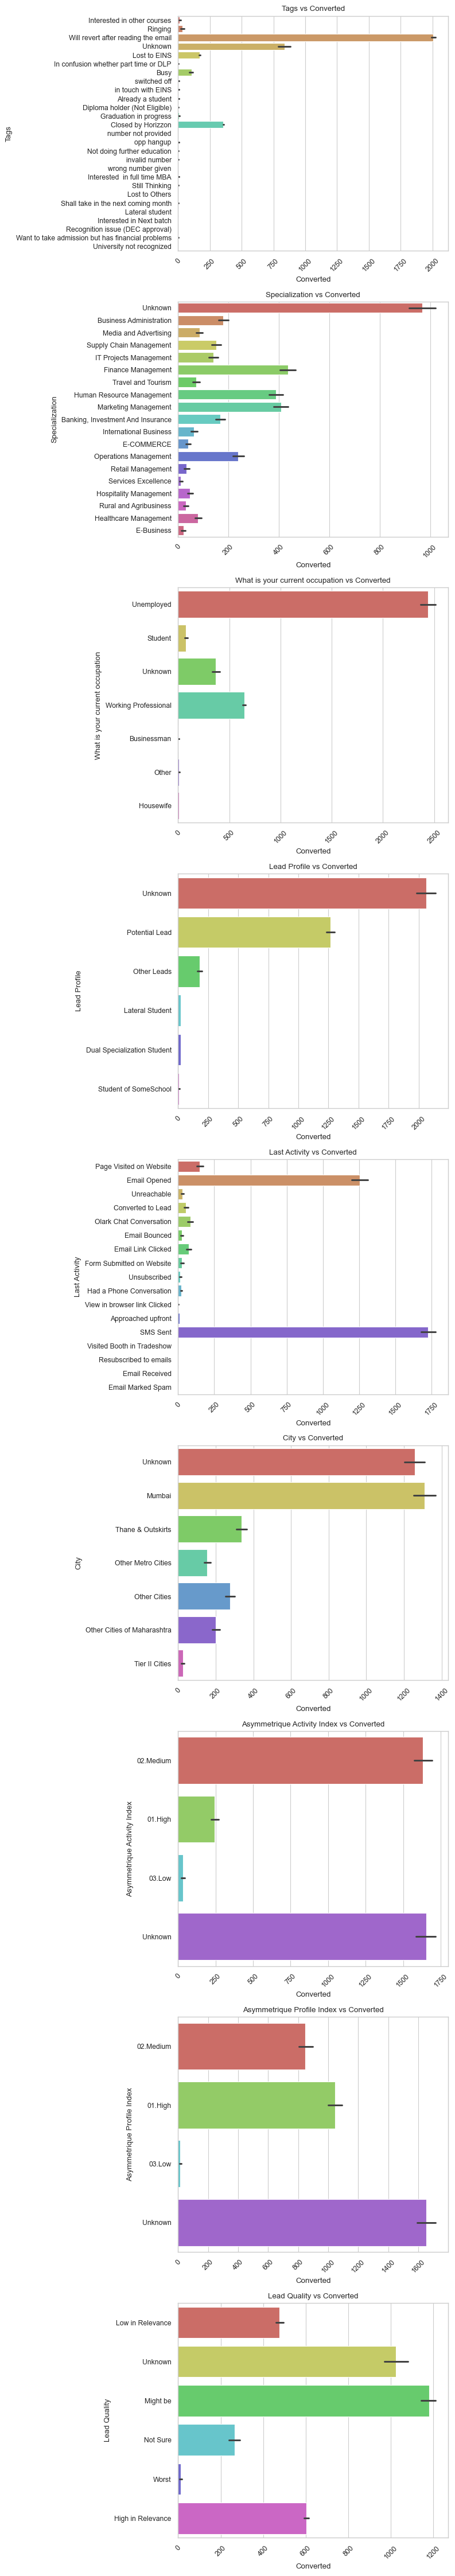

In [354]:
# Let's define a function to visualize using the graphs

def plot_bar_subplots(columns, target, data):
    fig, axes = plt.subplots(len(columns), 1, figsize=(8, len(columns) * 5))
    
    for i, col in enumerate(columns):
        sns.barplot(y=col, x=target, palette='hls', data=data, estimator=np.sum, ax=axes[i])
        axes[i].set_title(f'{col} vs {target}')
        axes[i].set_xlabel(target)
        axes[i].set_ylabel(col)
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Example usage
columns_to_plot = ['Tags', 'Specialization','What is your current occupation','Lead Profile','Last Activity', 
                   'City','Asymmetrique Activity Index','Asymmetrique Profile Index', 'Lead Quality']
plot_bar_subplots(columns_to_plot, 'Converted', df)

In [355]:
def plot_val_cnts(df,columns):
    for col in columns:
        value_counts = df[col].value_counts() # we will compute value counts for all columns in the list
        
        #plot bar chart
        plt.figure(figsize=(8,5))  #initiate the figure size
        value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Value counts for column: {col}',fontsize=14)
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=90, fontsize=9) #displayes labels in 90 degree angle
        plt.tight_layout() #it automatically adjust the spacing between subplots and the figure edges (prevent overlapping like labels, titles)
        
        # after all display the plot
        plt.show()
    else:
        print(f"Column '{col}' not found in DataFrame.")

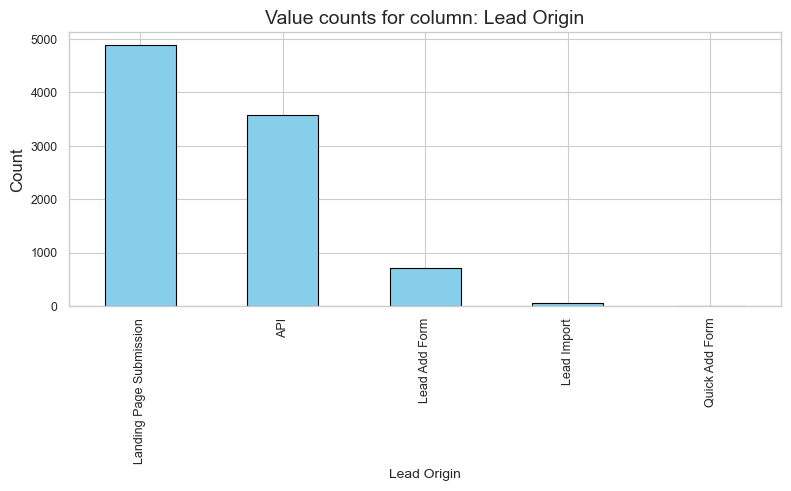

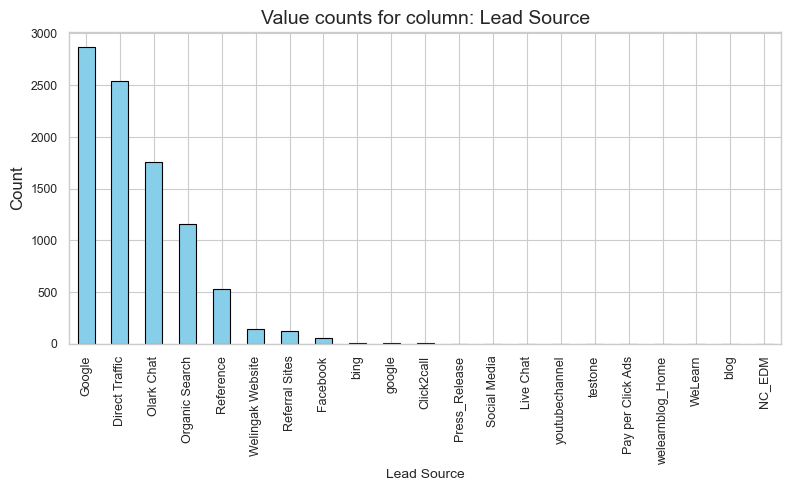

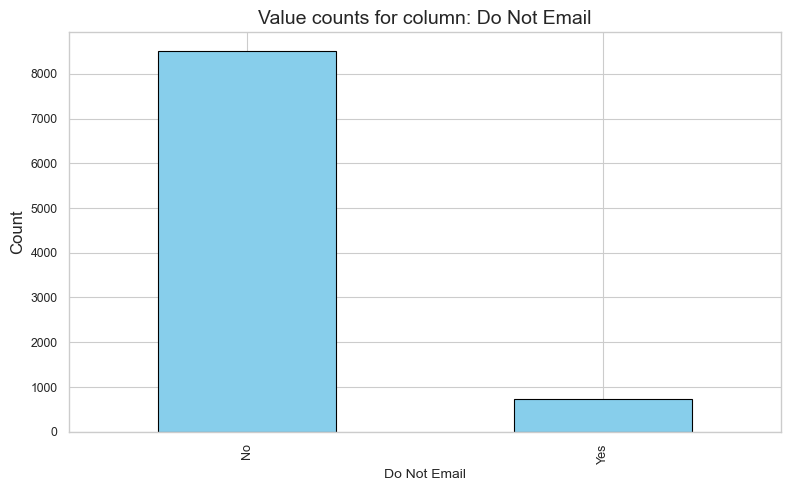

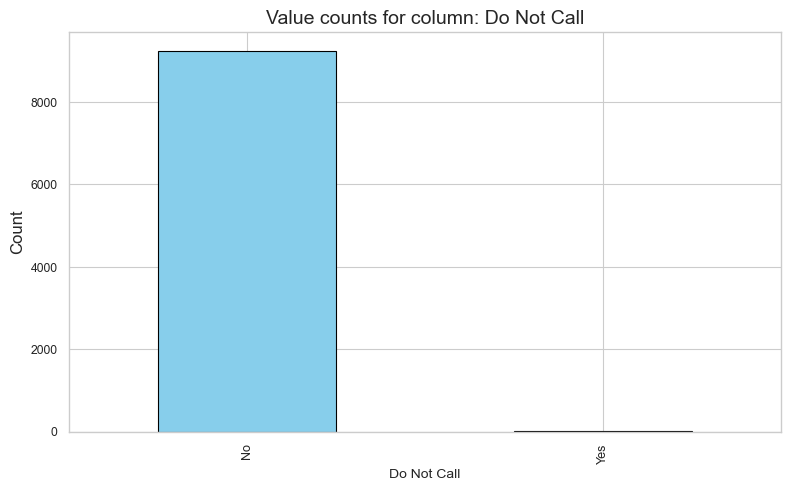

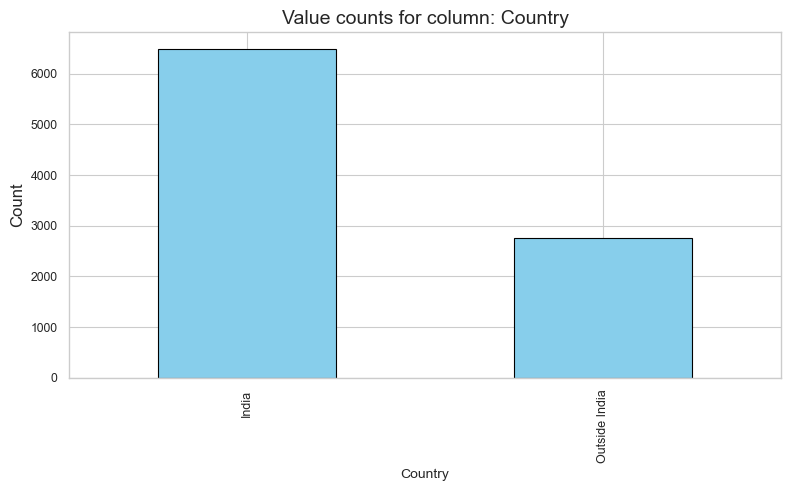

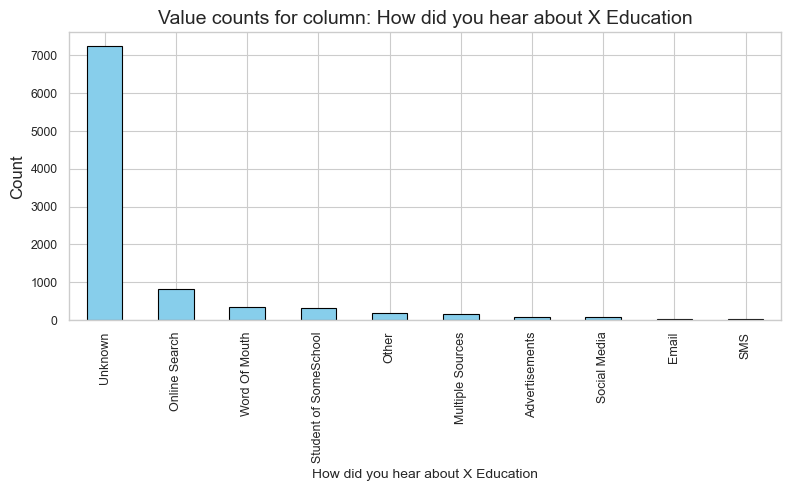

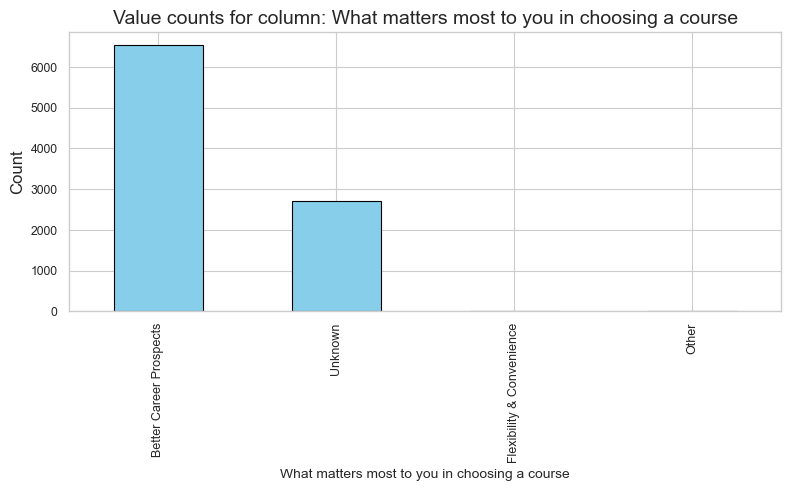

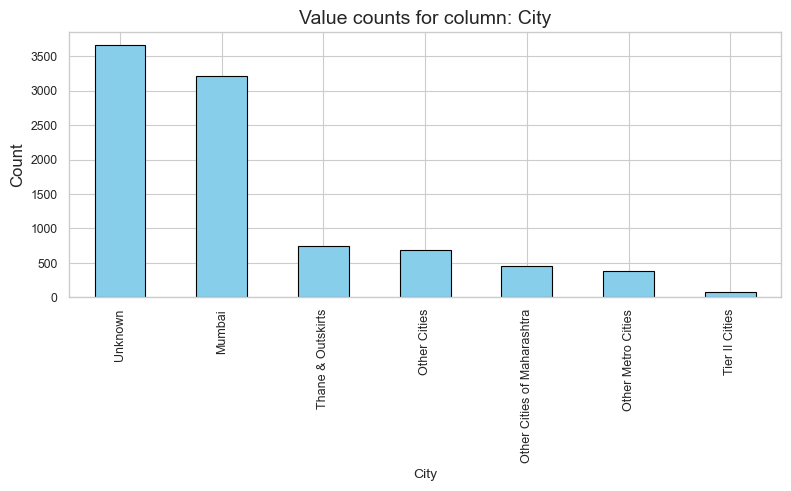

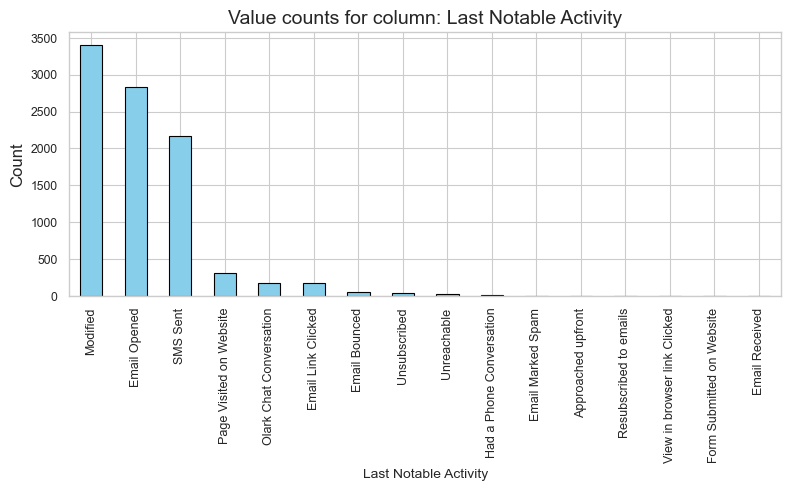

Column 'Last Notable Activity' not found in DataFrame.


In [356]:
columns = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Country','How did you hear about X Education', 
           'What matters most to you in choosing a course','City','Last Notable Activity']
plot_val_cnts(df,columns)

In [357]:
# we can check the above graphs with respect to the converted or not converted
def plot_val_cnts(df,columns, target):
    
    for col in columns:
        if col in df.columns and target in df.columns:
            grouped = df.groupby([col, target]).size().unstack(fill_value=0)            
            #value_counts = df[col].value_counts() # we will compute value counts for all columns in the list

            #plot bar chart
            grouped.plot(kind='bar', figsize=(5,5), color=['skyblue', 'orange'])
            #value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
            plt.title(f'Value counts for column: {col} with Hue:{target}',fontsize=14)
            plt.xlabel(col, fontsize=10)
            plt.ylabel('Count', fontsize=12)
            plt.xticks(rotation=90, fontsize=10) #displayes labels in 45 degree angle
            plt.legend(title=target, fontsize=10)
            plt.tight_layout() #it automatically adjust the spacing between subplots and the figure edges (prevent overlapping like labels, titles)

            # after all display the plot
            plt.show()
        else:
            print(f"Column '{col}' or target {target} not found in DataFrame.")

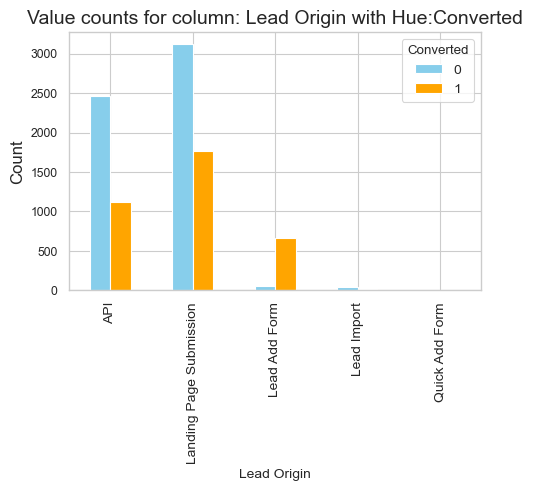

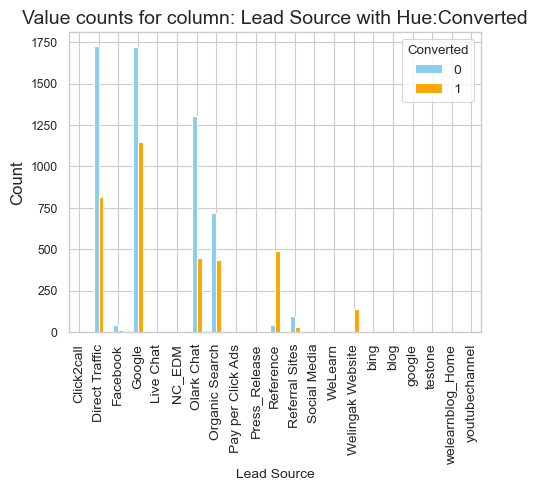

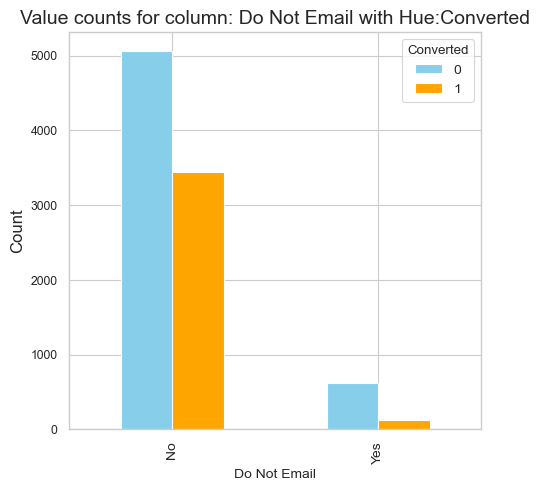

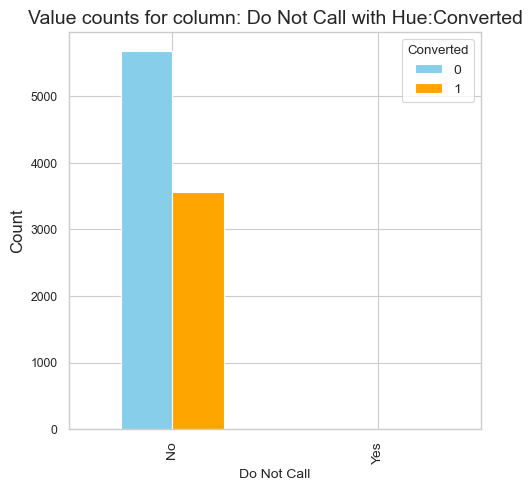

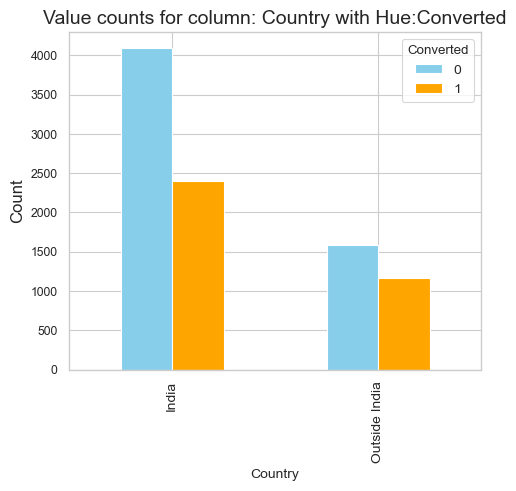

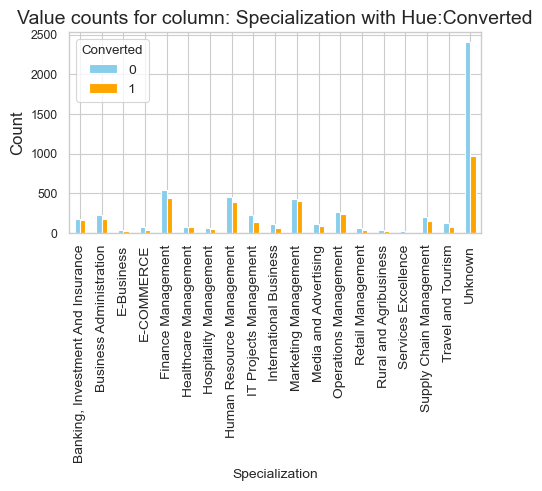

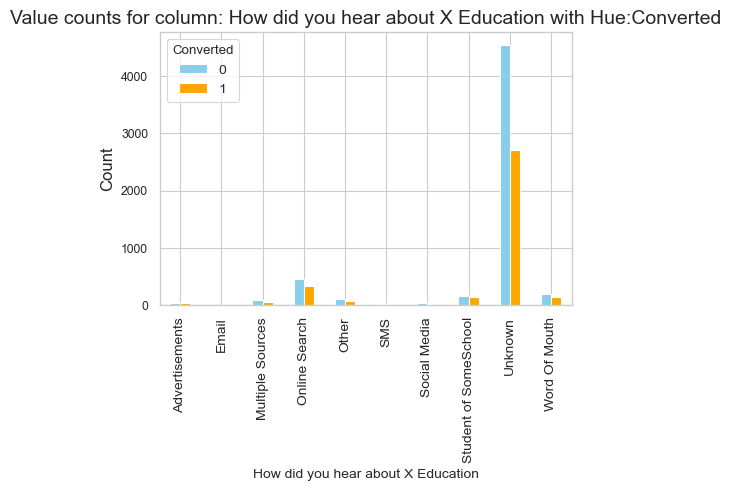

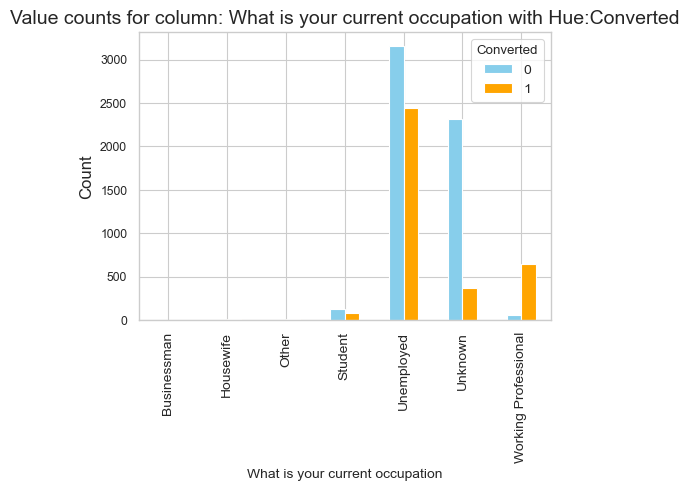

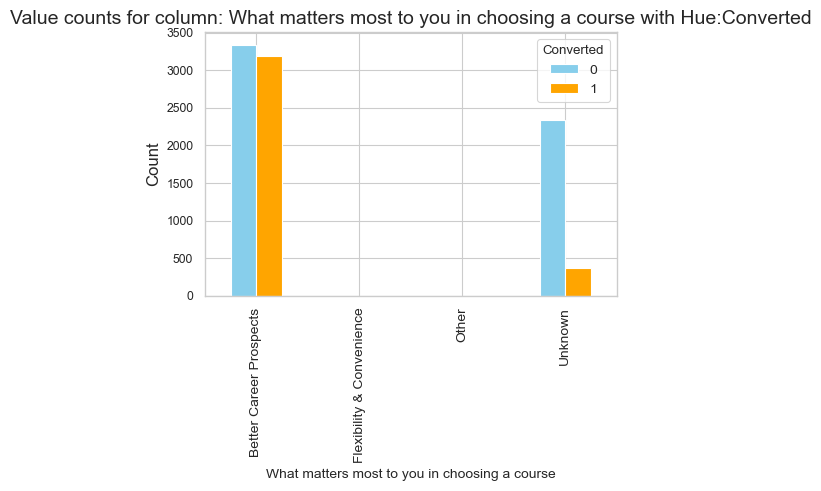

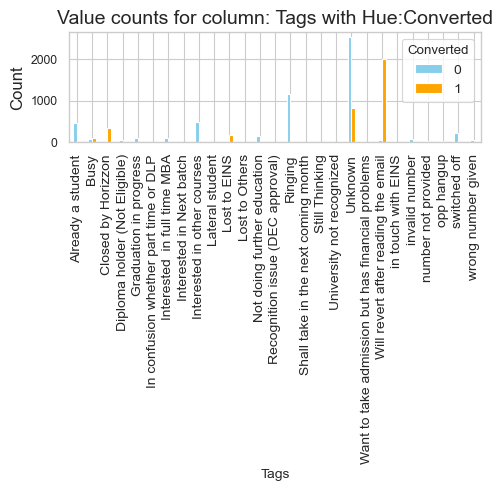

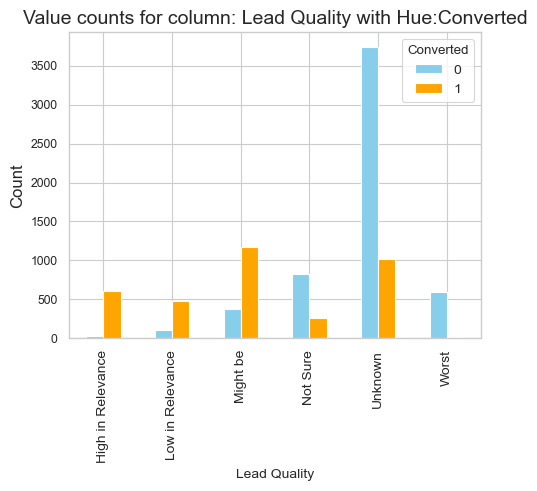

Column 'Update me on Supply Chain Content' or target Converted not found in DataFrame.
Column 'Get updates on DM Content' or target Converted not found in DataFrame.


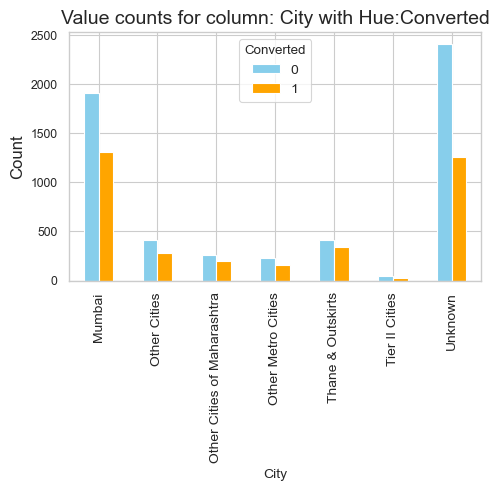

Column 'I agree to pay the amount through cheque' or target Converted not found in DataFrame.


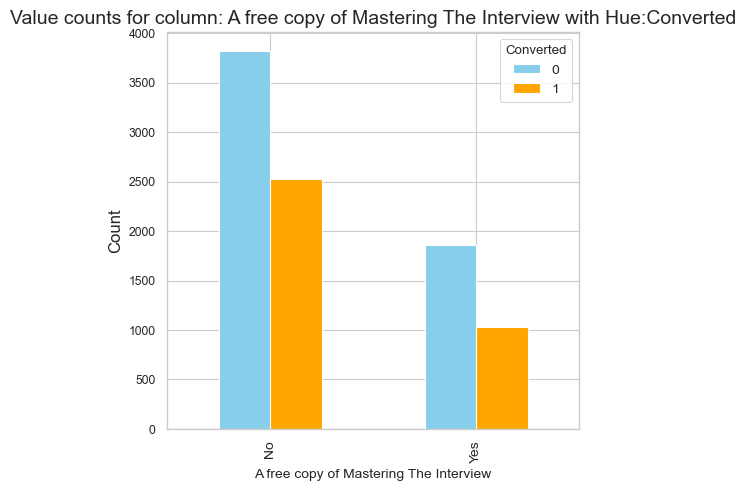

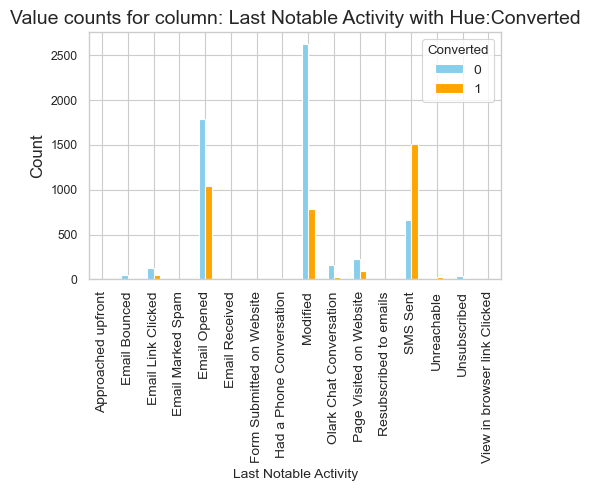

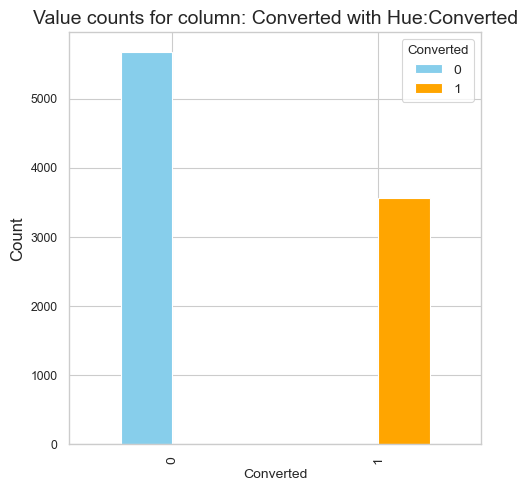

In [358]:
columns = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Country','Specialization','How did you hear about X Education', 'What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Update me on Supply Chain Content','Get updates on DM Content','City','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity', 'Converted']
target = 'Converted'
plot_val_cnts(df,columns,target)

#### Let's check the Outliers and perform the required treatment

In [359]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Lead Number,9240.00,617188.44,23406.00,579533.00,596484.50,615479.00,637387.25,650506.10,655404.05,659592.98,660737.00
Converted,9240.00,0.39,0.49,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00
TotalVisits,9240.00,3.44,4.82,0.00,1.00,3.00,5.00,7.00,10.00,17.00,251.00
Total Time Spent on Website,9240.00,487.70,548.02,0.00,12.00,248.00,936.00,1380.00,1562.00,1840.61,2272.00
Page Views Per Visit,9240.00,2.36,2.15,0.00,1.00,2.00,3.00,5.00,6.00,9.00,55.00


##### Based on the above Graph we observe there are some Outliers which needs to be handled

In [360]:
# lets define a function to remove outliers

def remove_outliers(df, columns, cut_off=0.5): # default is given 1.5 for the keyword argument. We can overwrite this value.
    df_clean = df.copy()
    for col in columns:
        if col in df_clean.columns:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3-Q1
            
            #lowerbound
            lower_bound = Q1-cut_off*IQR
            #upperbound
            upper_bound = Q3+cut_off*IQR
            
            #Remove outliers
            df_clean = df_clean[(df_clean[col]>=lower_bound) & (df_clean[col]<=upper_bound)]
        else:
            print(f"Column '{col}' not in the DataFrame.")
    return df_clean

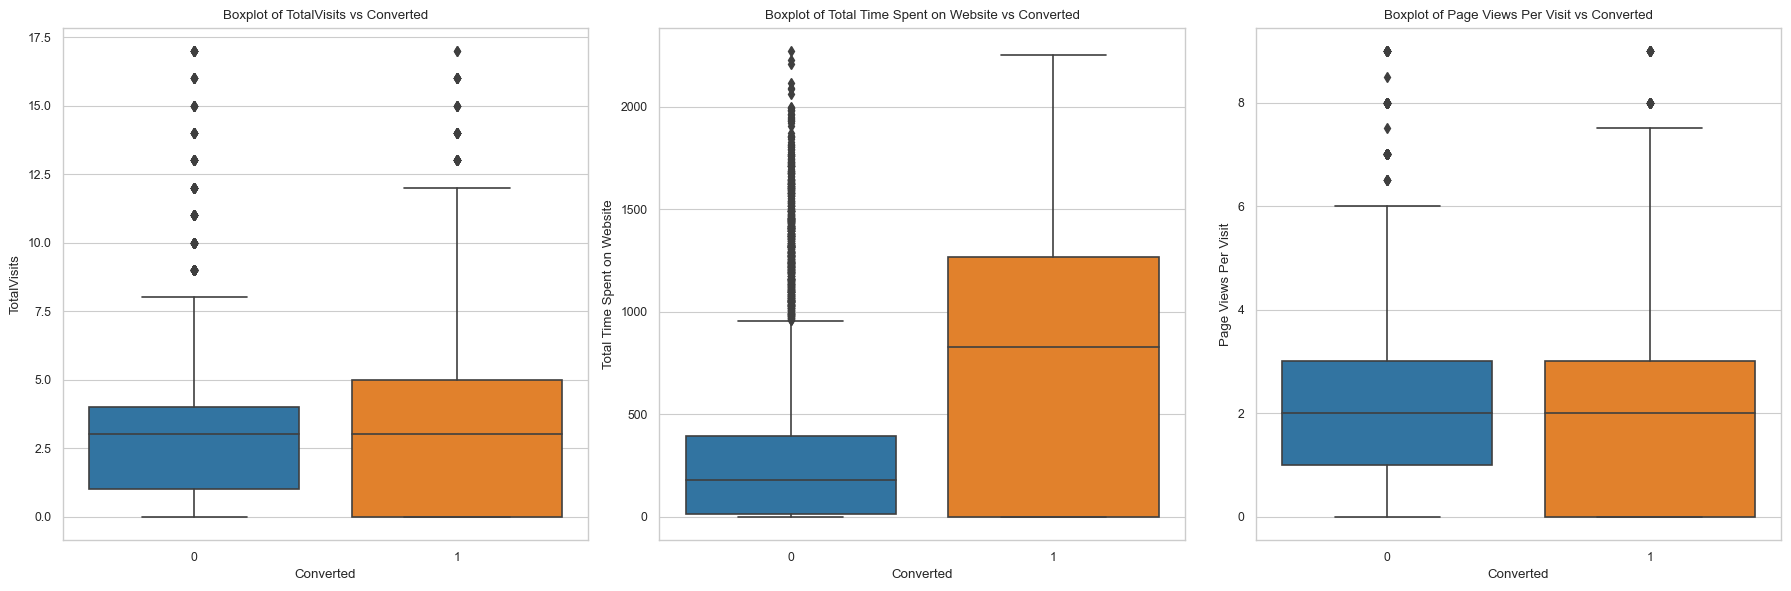

In [361]:
#Validate and remove the outliers and display the boxplots
columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
df_clean = remove_outliers(df, columns, cut_off=3)

# Create subplots
fig, axes = plt.subplots(1, len(columns), figsize=(18, 6), sharex=True)

# Generate boxplots for each column
for i, col in enumerate(columns):
    sns.boxplot(y=col, x='Converted', data=df_clean, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} vs Converted')
    axes[i].set_xlabel('Converted')
    axes[i].set_ylabel(col)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [362]:
df.shape

(9240, 23)

#### Feature Engineering 

In [363]:
#Convert all variable to numeric variables

var_list = ['Do Not Email', 'Do Not Call']

def map_list(a):
    return a.map({'Yes': 1, 'No':0})

df[var_list] = df[var_list].apply(map_list)

In [364]:
#rename the source google to Google.
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
#Since we have very less values for few hence we can merge them to others
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Facebook', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

#### Based on the analysis there are few columns which doen't give much value addtion hence we can remove those.



In [365]:
df['Last Activity']=df['Last Activity'].replace(['Approached upfront', 'Email Marked Spam', 'Email Received', 'Form Submitted on Website', 'Had a Phone Conversation', 'Resubscribed to emails', 'Unreachable', 'Unsubscribed', 'View in browser link Clicked', 'Visited Booth in Tradeshow'], 'Others')

In [366]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [367]:
#Convert the categorical variables to numeric variables by introducing the dummies by following the below steps
#Introduce dummies-->concatenate-->drop the old columns

df_dummies = pd.get_dummies(df , columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                          'What is your current occupation', 'Tags','Lead Quality','City',
                                          'How did you hear about X Education', 'Lead Profile','Country','Last Notable Activity'], drop_first=True)



In [368]:
df_dummies.replace({False: 0, True:1}, inplace=True)


In [369]:
df_dummies.drop(columns =['What matters most to you in choosing a course', 'Asymmetrique Activity Index','Asymmetrique Profile Index'], axis=1,inplace=True )

In [370]:
df_dummies.drop('A free copy of Mastering The Interview', axis=1)

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Unknown,How did you hear about X Education_Word Of Mouth,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,Country_Outside India,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.00,0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.00,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [371]:
# Adding the results to the master dataframe
df = pd.concat([df, df_dummies], axis=1)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Unknown,How did you hear about X Education_Word Of Mouth,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,Country_Outside India,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachabl

In [372]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization','Tags','Lead Quality','How did you hear about X Education','What is your current occupation', 'City','What matters most to you in choosing a course',
              'Lead Profile', 'City', 'Asymmetrique Activity Index','Asymmetrique Profile Index','Last Notable Activity'], axis = 1)

In [373]:
df = df.loc[:, ~df.columns.duplicated(keep='first')] 

In [374]:
df['A free copy of Mastering The Interview'].replace({'No': 0, 'Yes':1}, inplace=True)

In [375]:
df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Unknown,How did you hear about X Education_Word Of Mouth,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,Country_Outside India,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.00,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.00,674,2.50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [376]:
# Checking the conversion Percentage
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.53896103896104

### We will split the data into Train and Test

In [377]:
#Import the required train test split library
from sklearn.model_selection import train_test_split

In [378]:
X= df.drop(['Lead Number','Converted'], axis=1)

In [379]:
X.head(3)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Unknown,How did you hear about X Education_Word Of Mouth,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,Country_Outside India,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.00,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.00,674,2.50,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [380]:
y = df['Converted']

In [381]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [382]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [383]:
print(X_train.shape)
print(X_test.shape)


(6468, 115)
(2772, 115)


In [384]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Unknown,How did you hear about X Education_Word Of Mouth,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,Country_Outside India,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,64

#### Since we have few columns in different scale for ex 'TotalVisits','Total Time Spent on Website','Page Views Per Visit' we have to perform scaling.

In [385]:
#We have to do the feature scaling for the required columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Unknown,How did you hear about X Education_Word Of Mouth,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,Country_Outside India,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-0.66,-0.89,-1.09,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.10,0.01,-0.47,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,

In [386]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Unknown,How did you hear about X Education_Word Of Mouth,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,Country_Outside India,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,64

### Build The Model

In [387]:
import statsmodels.api as sm

In [388]:
lm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                          113
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 21 Jan 2025   Deviance:                       53938.
Time:                        22:17:49   Pearson chi2:                 2.63e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                     6.443e+14   3.41e+07   1.89e+07      0.000    6.44e+14    6.44e+14
Do Not Email                                             -1.113e+14   4.46e+06  -2.49e+07      0.000   -1.11e+14   -1.11e+14
Do Not Call                                              -1.718e+14    4.8e+07  -3.58e+06      0.000   -1.72e+14   -1.72e+14
TotalVisits                                               1.322e+13   9.96e+05   1.33e+07      0.000    1.32e+13    1.32e+13
Total Time Spent on Website                               9.246e+13      1e+06   9.24e+07      0.000    9.25e+13    9.25e+13
Page Views Per Visit                                      5.705e+12   1.19e+06   4.81e+06      0.000    5.71e+12    5.71e+12
A free copy of Mastering The Interview                    -1.88e+14    3.1e+06  -6.06e+07      0.000   -1.88e+14   -1.88e+14
Lead Origin_Landing Page Submission                      -9.742e+13   4.19e+06  -2.32e+07      0.000   -9.74e+13   -9.74e+13
Lead Origin_Lead Add Form                                -2.341e+13   1.29e+07  -1.81e+06      0.000   -2.34e+13   -2.34e+13
Lead Origin_Lead Import                                   4.786e+14      2e+07    2.4e+07      0.000    4.79e+14    4.79e+14
Lead Origin_Quick Add Form                                 6.02e+15   6.91e+07   8.71e+07      0.000    6.02e+15    6.02e+15
Lead Source_Google                                        -2.65e+13   3.05e+06   -8.7e+06      0.000   -2.65e+13   -2.65e+13
Lead Source_Olark Chat                                   -2.396e+14   5.18e+06  -4.63e+07      0.000    -2.4e+14    -2.4e+14
Lead Source_Organic Search                               -6.951e+13   3.22e+06  -2.16e+07      0.000   -6.95e+13   -6.95e+13
Lead Source_Others                                       -5.947e+14   1.56e+07  -3.82e+07      0.000   -5.95e+14   -5.95e+14
Lead Source_Reference                                    -2.905e+14   1.26e+07   -2.3e+07      0.000    -2.9e+14    -2.9e+14
Lead Source_Referral Sites                                1.318e+14   7.62e+06   1.73e+07      0.000    1.32e+14    1.32e+14
Lead Source_Welingak Website                              4.945e+14    1.4e+07   3.52e+07      0.000    4.94e+14    4.94e+14
Last Activity_Email Bounced                              -1.764e+14   7.32e+06  -2.41e+07      0.000   -1.76e+14   -1.76e+14
Last Activity_Email Link Clicked                          3.765e+14   9.18e+06    4.1e+07      0.000    3.77e+14    3.77e+14
Last Activity_Email Opened                                1.526e+14   4.93e+06    3.1e+07      0.000    1.53e+14    1.53e+14
Last Activity_Olark Chat Conversation                     1.925e+14   4.92e+06   3.

#### Select the features using RFE


In [389]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator = lgr, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [390]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
        True, False,  True,  True, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True,  True, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False])

In [391]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 2),
 ('Do Not Call', False, 61),
 ('TotalVisits', False, 64),
 ('Total Time Spent on Website', False, 11),
 ('Page Views Per Visit', False, 89),
 ('A free copy of Mastering The Interview', False, 72),
 ('Lead Origin_Landing Page Submission', False, 29),
 ('Lead Origin_Lead Add Form', False, 35),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Origin_Quick Add Form', False, 71),
 ('Lead Source_Google', False, 91),
 ('Lead Source_Olark Chat', False, 50),
 ('Lead Source_Organic Search', False, 93),
 ('Lead Source_Others', False, 44),
 ('Lead Source_Reference', False, 36),
 ('Lead Source_Referral Sites', False, 75),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 34),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Opened', False, 28),
 ('Last Activity_Olark Chat Conversation', False, 45),
 ('Last Activity_Others', False, 26),
 ('Last Activity_Page Visited on Website', False, 76),
 ('Last Activity_SMS Se

In [392]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested in Next batch', 'Tags_Lateral student',
       'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Unknown',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [393]:
#Assess the model with Stas Models
X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1258.5
Date:                Tue, 21 Jan 2025   Deviance:                       2516.9
Time:                        22:17:55   Pearson chi2:                 1.57e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6095
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6255      0.206    -12.759      0.000      -3.029      -2.222
Lead Source_Welingak Website                      2.8228      0.753      3.748      0.000       1.347       4.299
Last Activity_SMS Sent                            2.1411      0.122     17.559      0.000       1.902       2.380
What is your current occupation_Unknown          -2.5386      0.145    -17.486      0.000      -2.823      -2.254
Tags_Busy                                         1.7305      0.293      5.901      0.000       1.156       2.305
Tags_Closed by Horizzon                           9.2296      1.025      9.004      0.000       7.221      11.239
Tags_Diploma holder (Not Eligible)              -20.9320   1.79e+04     -0.001      0.999    -3.5e+04     3.5e+04
Tags_Interested in Next batch                    25.0505   5.86e+04      0.000      1.000   -1.15e+05    1.15e+05
Tags_Lateral student                             26.2784   7.37e+04      0.000      1.000   -1.44e+05    1.44e+05
Tags_Lost to EINS                                 9.2963      0.766     12.140      0.000       7.795      10.797
Tags_Ringing                                     -2.0442      0.296     -6.901      0.000      -2.625      -1.464
Tags_Unknown                                      3.1456      0.231     13.624      0.000       2.693       3.598
Tags_Will revert after reading the email          6.0393      0.255     23.705      0.000       5.540       6.539
Tags_invalid number                              -2.3288      1.045     -2.229      0.026      -4.377      -0.281
Tags_number not provided                        -22.5664    2.5e+04     -0.001      0.999   -4.91e+04     4.9e+04
Tags_switched off                                -2.4889      0.554     -4.491      0.000      -3.575      -1.403
Tags_wrong number given                         -22.7473   2.12e+04     -0.001      0.999   -4.15e+04    4.14e+04
Lead Quality_Worst                               -2.1489      0.696     -3.087      0.002      -3.513      -0.785
Last Notable Activity_Email Link Clicked         -1.3452      0.470     -2.861      0.004      -2.267      -0.424
Last Notable Activity_Modified                   -1.5889      0.122    -12.971      0.000      -1.829      -1.349
Last Notable Activity_Olark Chat Conversation    -1.2075      0.419     -2.883      0.004      -2.028      -0.387
=================================================================================================================
"""

In [394]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871   0.01
6795   0.63
3516   0.01
8105   0.07
3934   0.26
4844   1.00
3297   0.01
8071   0.99
987    0.03
7423   1.00
dtype: float64

In [395]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00928806, 0.62716687, 0.00928806, 0.0738802 , 0.25563005,
       0.9961465 , 0.00928806, 0.99340749, 0.02640659, 0.9961465 ])

In [396]:
#creating a dataframe with actual churn
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.01,1871
1,0,0.63,6795
2,0,0.01,3516
3,0,0.07,8105
4,0,0.26,3934


In [397]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.01,1871,0
1,0,0.63,6795,1
2,0,0.01,3516,0
3,0,0.07,8105,0
4,0,0.26,3934,0


In [398]:
from sklearn import metrics

In [399]:
#Create a confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3786  216]
 [ 226 2240]]


In [400]:
# Predicted     not_churn    churn
# Actual
# not_churn        3786      216
# churn            226       2240  

In [401]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9316635745207174


#### VIF Observation

In [402]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [403]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Unknown,4.99
2,What is your current occupation_Unknown,4.66
1,Last Activity_SMS Sent,1.68
18,Last Notable Activity_Modified,1.58
11,Tags_Will revert after reading the email,1.38
9,Tags_Ringing,1.13
0,Lead Source_Welingak Website,1.12
16,Lead Quality_Worst,1.11
4,Tags_Closed by Horizzon,1.08
8,Tags_Lost to EINS,1.06


#### Based on above we can say that no much multicolinearity exists.

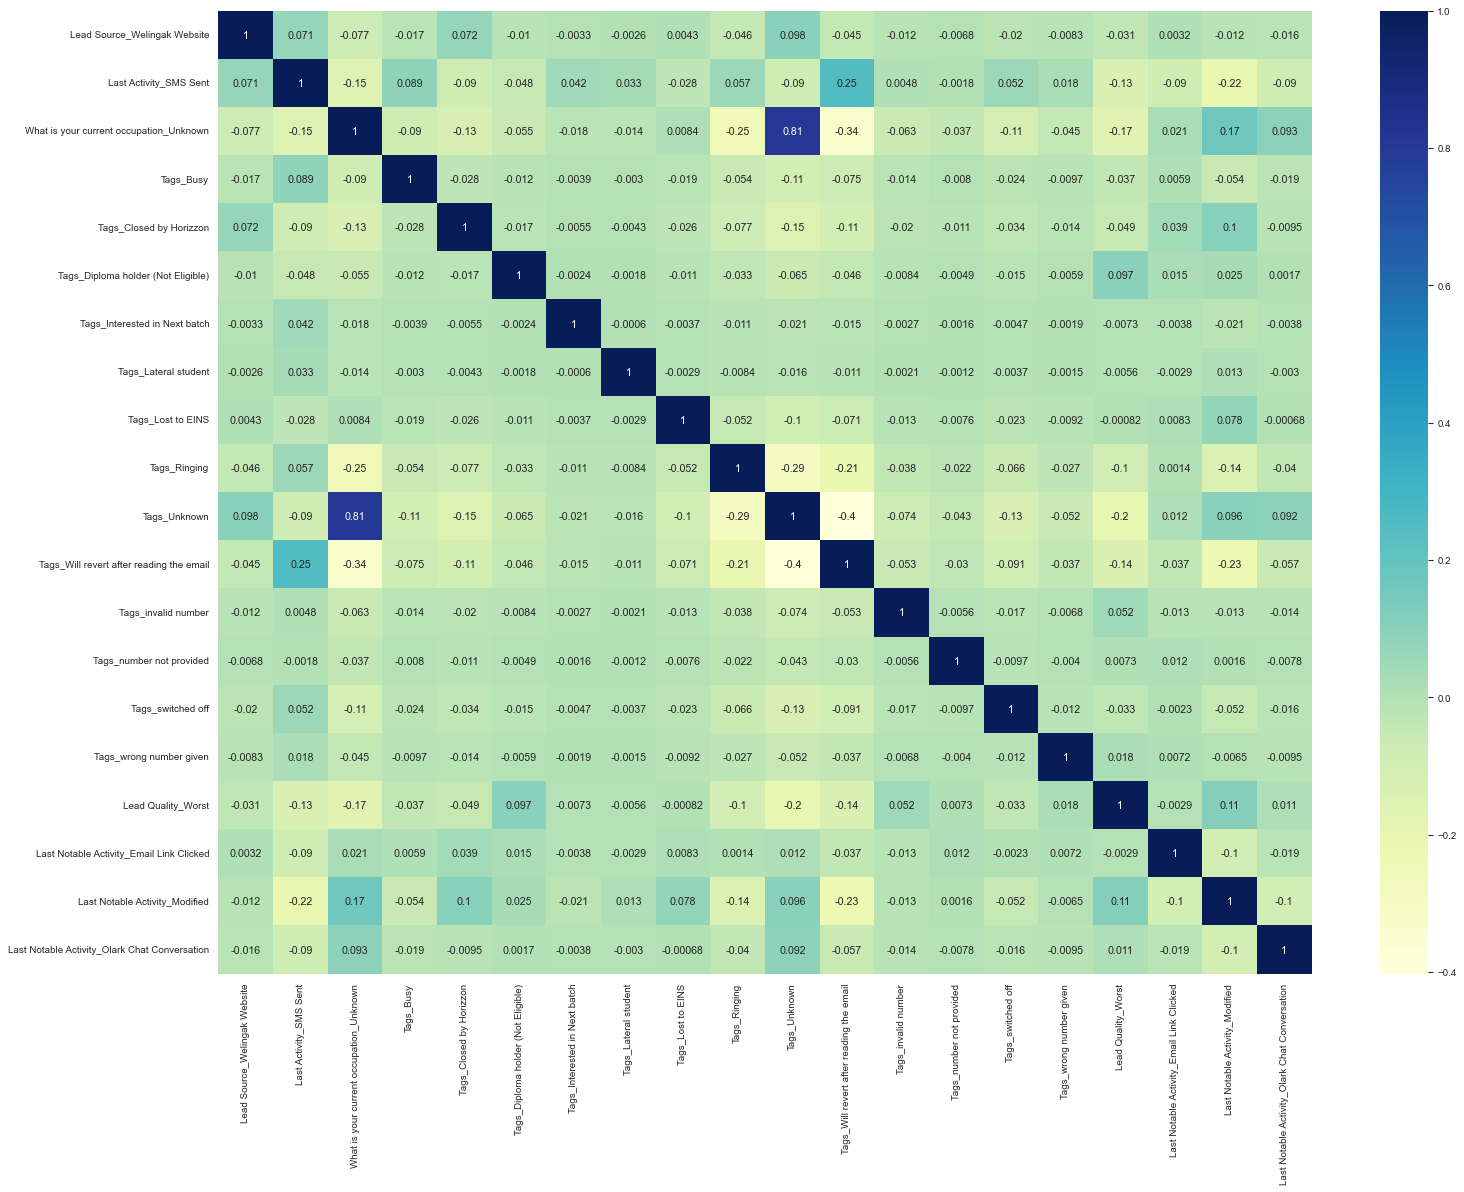

In [404]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

#### As per the guidelines the high p value and high VIF will not give much value addtion. Hence we can drop the columns and regenerate the model

In [405]:
col1 = col.drop('Tags_Diploma holder (Not Eligible)',1)

In [406]:
col1

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Unknown', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Unknown', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [407]:
X_train_sm = sm.add_constant(X_train[col1])
lm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1259.8
Date:                Tue, 21 Jan 2025   Deviance:                       2519.6
Time:                        22:17:57   Pearson chi2:                 1.58e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6093
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.6756      0.205    -13.064      0.000      -3.077      -2.274
Lead Source_Welingak Website                      2.8228      0.753      3.748      0.000       1.347       4.299
Last Activity_SMS Sent                            2.1449      0.122     17.580      0.000       1.906       2.384
What is your current occupation_Unknown          -2.5397      0.145    -17.487      0.000      -2.824      -2.255
Tags_Busy                                         1.7781      0.293      6.073      0.000       1.204       2.352
Tags_Closed by Horizzon                           9.2790      1.025      9.054      0.000       7.270      11.288
Tags_Interested in Next batch                    25.0967   5.86e+04      0.000      1.000   -1.15e+05    1.15e+05
Tags_Lateral student                             26.3238   7.37e+04      0.000      1.000   -1.44e+05    1.44e+05
Tags_Lost to EINS                                 9.3466      0.766     12.208      0.000       7.846      10.847
Tags_Ringing                                     -1.9973      0.296     -6.753      0.000      -2.577      -1.418
Tags_Unknown                                      3.1949      0.230     13.882      0.000       2.744       3.646
Tags_Will revert after reading the email          6.0887      0.254     23.959      0.000       5.591       6.587
Tags_invalid number                              -2.2819      1.045     -2.184      0.029      -4.330      -0.234
Tags_number not provided                        -22.5192    2.5e+04     -0.001      0.999   -4.91e+04     4.9e+04
Tags_switched off                                -2.4422      0.554     -4.408      0.000      -3.528      -1.356
Tags_wrong number given                         -22.7003   2.12e+04     -0.001      0.999   -4.15e+04    4.14e+04
Lead Quality_Worst                               -2.1492      0.696     -3.088      0.002      -3.513      -0.785
Last Notable Activity_Email Link Clicked         -1.3493      0.469     -2.875      0.004      -2.269      -0.430
Last Notable Activity_Modified                   -1.5879      0.123    -12.963      0.000      -1.828      -1.348
Last Notable Activity_Olark Chat Conversation    -1.2076      0.419     -2.884      0.004      -2.028      -0.387
=================================================================================================================
"""

In [408]:
col2 = col1.drop('Tags_Interested in Next batch',1)

In [409]:
X_train_sm = sm.add_constant(X_train[col2])
lm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1264.5
Date:                Tue, 21 Jan 2025   Deviance:                       2529.1
Time:                        22:17:57   Pearson chi2:                 1.63e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6087
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.5679      0.194    -13.257      0.000      -2.948      -2.188
Lead Source_Welingak Website                      2.8275      0.754      3.751      0.000       1.350       4.305
Last Activity_SMS Sent                            2.1767      0.122     17.882      0.000       1.938       2.415
What is your current occupation_Unknown          -2.5497      0.146    -17.490      0.000      -2.835      -2.264
Tags_Busy                                         1.6538      0.285      5.800      0.000       1.095       2.213
Tags_Closed by Horizzon                           9.1854      1.023      8.980      0.000       7.181      11.190
Tags_Lateral student                             26.1987   7.36e+04      0.000      1.000   -1.44e+05    1.44e+05
Tags_Lost to EINS                                 9.2675      0.764     12.137      0.000       7.771      10.764
Tags_Ringing                                     -2.1311      0.287     -7.415      0.000      -2.694      -1.568
Tags_Unknown                                      3.0872      0.221     13.997      0.000       2.655       3.520
Tags_Will revert after reading the email          5.9873      0.246     24.357      0.000       5.506       6.469
Tags_invalid number                              -2.4123      1.043     -2.313      0.021      -4.457      -0.368
Tags_number not provided                        -22.6464    2.5e+04     -0.001      0.999   -4.89e+04    4.89e+04
Tags_switched off                                -2.5776      0.550     -4.690      0.000      -3.655      -1.500
Tags_wrong number given                         -22.8278   2.11e+04     -0.001      0.999   -4.14e+04    4.13e+04
Lead Quality_Worst                               -2.2324      0.688     -3.245      0.001      -3.581      -0.884
Last Notable Activity_Email Link Clicked         -1.3533      0.469     -2.883      0.004      -2.273      -0.433
Last Notable Activity_Modified                   -1.6048      0.122    -13.121      0.000      -1.845      -1.365
Last Notable Activity_Olark Chat Conversation    -1.2086      0.419     -2.885      0.004      -2.030      -0.388
=================================================================================================================
"""

In [410]:
col3 = col2.drop('Tags_Lateral student',1)

In [411]:
X_train_sm = sm.add_constant(X_train[col3])
lm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1269.6
Date:                Tue, 21 Jan 2025   Deviance:                       2539.2
Time:                        22:17:57   Pearson chi2:                 1.64e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6081
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.5016      0.188    -13.313      0.000      -2.870      -2.133
Lead Source_Welingak Website                      2.8237      0.754      3.746      0.000       1.346       4.301
Last Activity_SMS Sent                            2.1987      0.122     18.088      0.000       1.960       2.437
What is your current occupation_Unknown          -2.5566      0.146    -17.514      0.000      -2.843      -2.270
Tags_Busy                                         1.5717      0.281      5.586      0.000       1.020       2.123
Tags_Closed by Horizzon                           9.1077      1.022      8.914      0.000       7.105      11.110
Tags_Lost to EINS                                 9.2012      0.762     12.071      0.000       7.707      10.695
Tags_Ringing                                     -2.2163      0.283     -7.819      0.000      -2.772      -1.661
Tags_Unknown                                      3.0137      0.215     13.994      0.000       2.592       3.436
Tags_Will revert after reading the email          5.9124      0.241     24.529      0.000       5.440       6.385
Tags_invalid number                              -2.4953      1.042     -2.394      0.017      -4.538      -0.453
Tags_number not provided                        -22.7283   2.49e+04     -0.001      0.999   -4.89e+04    4.88e+04
Tags_switched off                                -2.6637      0.548     -4.864      0.000      -3.737      -1.590
Tags_wrong number given                         -22.9108   2.11e+04     -0.001      0.999   -4.13e+04    4.13e+04
Lead Quality_Worst                               -2.2915      0.683     -3.355      0.001      -3.630      -0.953
Last Notable Activity_Email Link Clicked         -1.3472      0.469     -2.872      0.004      -2.266      -0.428
Last Notable Activity_Modified                   -1.5916      0.122    -13.077      0.000      -1.830      -1.353
Last Notable Activity_Olark Chat Conversation    -1.2017      0.419     -2.870      0.004      -2.022      -0.381
=================================================================================================================
"""

In [412]:
col4 = col3.drop('Tags_number not provided',1)

In [413]:
X_train_sm = sm.add_constant(X_train[col4])
lm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1272.9
Date:                Tue, 21 Jan 2025   Deviance:                       2545.8
Time:                        22:17:57   Pearson chi2:                 1.62e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6077
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.5843      0.188    -13.725      0.000      -2.953      -2.215
Lead Source_Welingak Website                      2.8204      0.753      3.744      0.000       1.344       4.297
Last Activity_SMS Sent                            2.1804      0.121     18.032      0.000       1.943       2.417
What is your current occupation_Unknown          -2.5507      0.146    -17.521      0.000      -2.836      -2.265
Tags_Busy                                         1.6637      0.280      5.932      0.000       1.114       2.213
Tags_Closed by Horizzon                           9.1805      1.022      8.984      0.000       7.178      11.183
Tags_Lost to EINS                                 9.2669      0.763     12.153      0.000       7.772      10.761
Tags_Ringing                                     -2.1186      0.282     -7.506      0.000      -2.672      -1.565
Tags_Unknown                                      3.0957      0.216     14.356      0.000       2.673       3.518
Tags_Will revert after reading the email          5.9903      0.242     24.793      0.000       5.517       6.464
Tags_invalid number                              -2.3988      1.042     -2.303      0.021      -4.440      -0.357
Tags_switched off                                -2.5650      0.547     -4.690      0.000      -3.637      -1.493
Tags_wrong number given                         -21.8160   1.28e+04     -0.002      0.999   -2.51e+04    2.51e+04
Lead Quality_Worst                               -2.2583      0.686     -3.292      0.001      -3.603      -0.914
Last Notable Activity_Email Link Clicked         -1.3467      0.468     -2.875      0.004      -2.265      -0.429
Last Notable Activity_Modified                   -1.5794      0.122    -12.991      0.000      -1.818      -1.341
Last Notable Activity_Olark Chat Conversation    -1.1991      0.419     -2.863      0.004      -2.020      -0.378
=================================================================================================================
"""

In [414]:
col5 = col4.drop('Tags_wrong number given',1)

In [415]:
X_train_sm = sm.add_constant(X_train[col5])
lm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1278.0
Date:                Tue, 21 Jan 2025   Deviance:                       2555.9
Time:                        22:17:58   Pearson chi2:                 1.58e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6071
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.7120      0.189    -14.362      0.000      -3.082      -2.342
Lead Source_Welingak Website                      2.8167      0.753      3.742      0.000       1.341       4.292
Last Activity_SMS Sent                            2.1529      0.120     17.931      0.000       1.918       2.388
What is your current occupation_Unknown          -2.5420      0.145    -17.528      0.000      -2.826      -2.258
Tags_Busy                                         1.8058      0.279      6.473      0.000       1.259       2.353
Tags_Closed by Horizzon                           9.2966      1.022      9.094      0.000       7.293      11.300
Tags_Lost to EINS                                 9.3713      0.763     12.283      0.000       7.876      10.867
Tags_Ringing                                     -1.9684      0.280     -7.022      0.000      -2.518      -1.419
Tags_Unknown                                      3.2234      0.216     14.930      0.000       2.800       3.647
Tags_Will revert after reading the email          6.1129      0.242     25.229      0.000       5.638       6.588
Tags_invalid number                              -2.2512      1.041     -2.163      0.031      -4.291      -0.211
Tags_switched off                                -2.4134      0.546     -4.422      0.000      -3.483      -1.344
Lead Quality_Worst                               -2.1964      0.691     -3.180      0.001      -3.550      -0.843
Last Notable Activity_Email Link Clicked         -1.3448      0.468     -2.874      0.004      -2.262      -0.428
Last Notable Activity_Modified                   -1.5655      0.121    -12.891      0.000      -1.803      -1.327
Last Notable Activity_Olark Chat Conversation    -1.1968      0.419     -2.858      0.004      -2.018      -0.376
=================================================================================================================
"""

In [416]:
#Create a dataframe that will contain all the names of the feature variables  and their respective VIF
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,10.96
8,Tags_Unknown,4.95
3,What is your current occupation_Unknown,3.30
9,Tags_Will revert after reading the email,2.58
7,Tags_Ringing,1.99
12,Lead Quality_Worst,1.41
5,Tags_Closed by Horizzon,1.29
11,Tags_switched off,1.24
14,Last Notable Activity_Modified,1.23
2,Last Activity_SMS Sent,1.18


In [417]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871   0.01
6795   0.63
3516   0.01
8105   0.07
3934   0.26
4844   1.00
3297   0.01
8071   0.99
987    0.03
7423   1.00
dtype: float64

In [418]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00919063, 0.62514213, 0.00919063, 0.07395966, 0.25845222,
       0.99614272, 0.00919063, 0.99343362, 0.02669889, 0.99614272])

In [419]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.01,1871
1,0,0.63,6795
2,0,0.01,3516
3,0,0.07,8105
4,0,0.26,3934


In [420]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.01,1871,0
1,0,0.63,6795,1
2,0,0.01,3516,0
3,0,0.07,8105,0
4,0,0.26,3934,0


##### Check the confusion matrix with the final predicted dataset

In [421]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3786  216]
 [ 234 2232]]


In [422]:
# Predicted     not_churn    churn
# Actual
# not_churn        3786      216
# churn            234       2232  

In [423]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9304267161410018


In [424]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Unknown,4.99
2,What is your current occupation_Unknown,4.66
1,Last Activity_SMS Sent,1.66
13,Last Notable Activity_Modified,1.57
8,Tags_Will revert after reading the email,1.37
6,Tags_Ringing,1.13
0,Lead Source_Welingak Website,1.12
11,Lead Quality_Worst,1.10
4,Tags_Closed by Horizzon,1.08
5,Tags_Lost to EINS,1.06


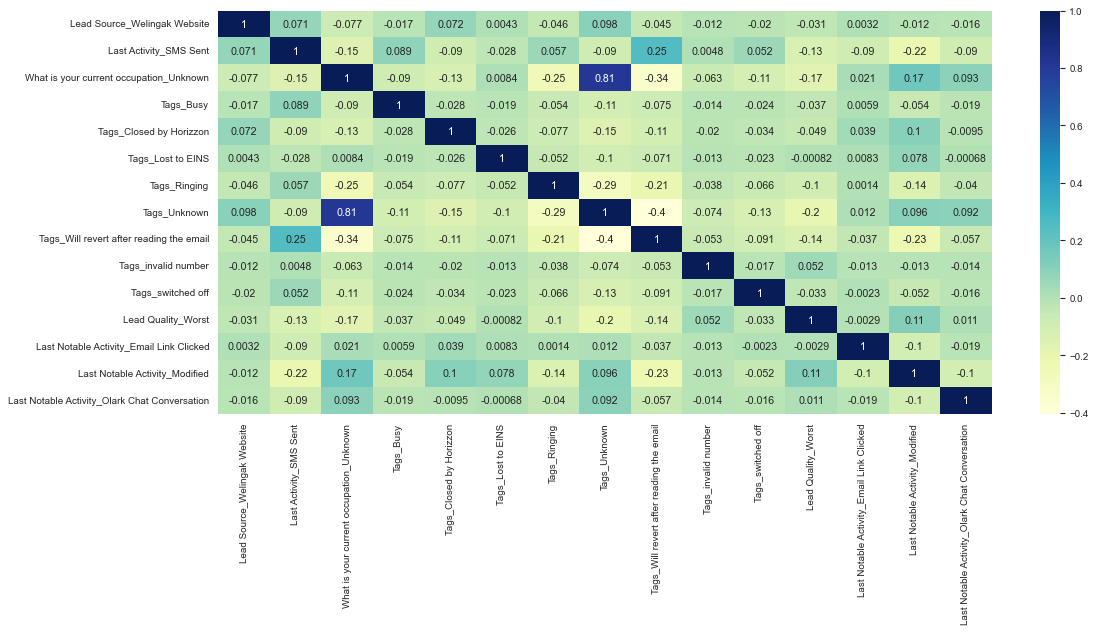

In [425]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(15,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col5].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Our latest model have the following features:
 - <font color = green>All variables have p-value < 0.05. </font>
 - <font color = green>All the features have low VIF values which is less than 5, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.</font>
 - <font color = green>The overall accuracy of 0.9305 at a probability threshold of 0.05 is also very acceptable.</font>
 
#### So we need not drop any more variables and can be proceeded further

#### We see now the model is having All the features have significant P Values and VIF under 5.  Now we will Evaluate the model

## Calculate the Metrics

### Let's check the Confusion matrix

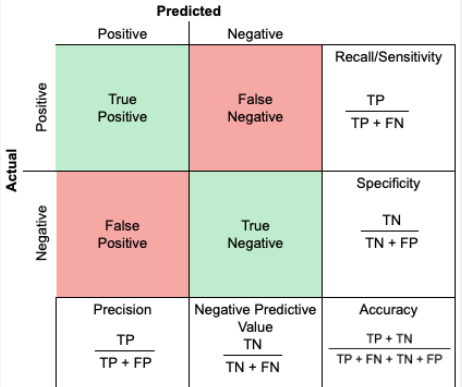

    TPR (True Positive Rate) = TP/(TP + FN)
    TNR (True Negative Rate) = TN/(TN + FP)
    FPR (False Positive Rate) = FP/(TN + FP)
    FNR (False Negative Rate) = FN/(TP + FN)
    
    Precision   : measures the accuracy of positive predictions, 
    Recall      : (also known as sensitivity) measures how well a model identifies all actual positive cases, 
    Specificity : is the accuracy of negative predictions, 
    Accuracy    : represents the overall proportion of correct classifications, considering both positive and negative 
                  predictions; 
    All these metrics are used to evaluate the performance of a classification model, particularly when dealing with binary 
    classification problems. 

In [426]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [427]:
# The sensitivity 
TP / float(TP+FN)

0.9051094890510949

In [428]:
# specificity
TN / float(TN+FP)

0.9460269865067467

In [429]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/ float(TN+FP)

0.053973013493253376

In [430]:
# positive predictive value 
TP / float(TP+FP)

0.9117647058823529

In [431]:
# Negative predictive value
TN / float(TN+ FN)

0.9417910447761194

### Plotting the ROC curve

   - <font color = green> A receiver operating characteristic (ROC) curve is a graph that shows how well a binary classifier
                          model 
    performs at different threshold values. It plots the true positive rate (TPR) against the false positive rate (FPR).

In [432]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [433]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

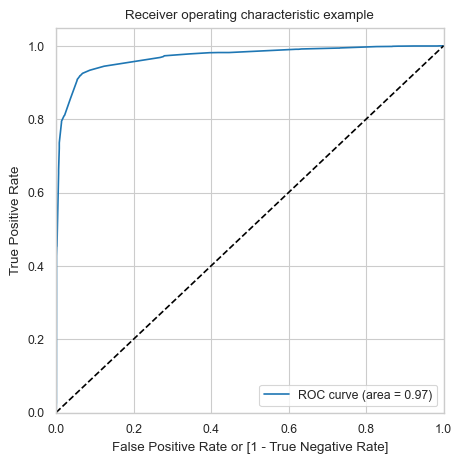

In [434]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Calculating the Area Under Curve (AUC) GINI

In [435]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [436]:
auc = auc_val(fpr,tpr)
auc

0.9697555419370606

As a rule of thumb, an AUC can be classed as follows,

    0.90 - 1.00 = excellent
    0.80 - 0.90 = good
    0.70 - 0.80 = fair
    0.60 - 0.70 = poor
    0.50 - 0.60 = fail
    Since we got a value of 0.9685, our model seems to be doing well on the test dataset.


In [437]:
#Let's check Optimal cutoff

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.01,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.63,6795,1,1,1,1,1,1,1,1,0,0,0
2,0,0.01,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.07,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.26,3934,0,1,1,1,0,0,0,0,0,0,0


In [438]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.82   0.97   0.72
0.20  0.20      0.92   0.93   0.91
0.30  0.30      0.93   0.92   0.94
0.40  0.40      0.93   0.91   0.95
0.50  0.50      0.93   0.91   0.95
0.60  0.60      0.92   0.86   0.96
0.70  0.70      0.91   0.81   0.98
0.80  0.80      0.91   0.79   0.99
0.90  0.90      0.89   0.73   0.99


<Figure size 1800x800 with 0 Axes>

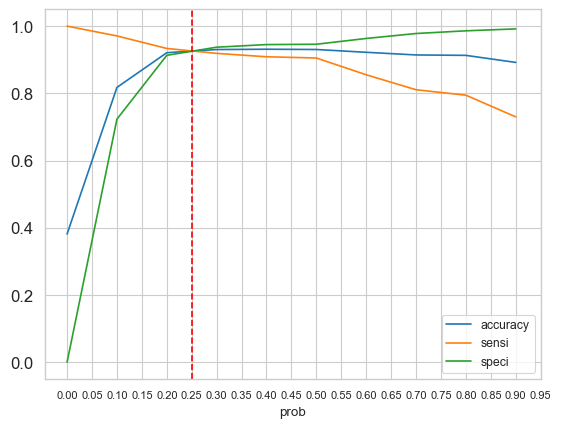

In [439]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.25, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

In [440]:
#### From the curve above, 0.25 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.01,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.63,6795,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.01,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.07,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.26,3934,0,1,1,1,0,0,0,0,0,0,0,1


In [442]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.01,1871,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0.63,6795,1,1,1,1,1,1,1,1,0,0,0,1,63
2,0,0.01,3516,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0.07,8105,0,1,0,0,0,0,0,0,0,0,0,0,7
4,0,0.26,3934,0,1,1,1,0,0,0,0,0,0,0,1,26


In [443]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9208410636982065

In [444]:
confusionf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusionf

array([[3654,  348],
       [ 164, 2302]], dtype=int64)

In [445]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [446]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity:',  TP / float(TP+FN))

# Let us calculate specificity
print('Specifcity:', TN / float(TN+FP))

print('Accuracy:', (TP+TN)/(TP+TN+FP+FN))
# Calculate false postive rate - predicting churn when customer does not have churned
print('FPR:',FP/ float(TN+FP))
# Positive predictive value 
print ('TPR:',TP / float(TP+FP))
# Negative predictive value
print ('TNR:',TN / float(TN+ FN))

Sensitivity: 0.9334955393349554
Specifcity: 0.9130434782608695
Accuracy: 0.9208410636982065
FPR: 0.08695652173913043
TPR: 0.8686792452830189
TNR: 0.9570455735987428


In [447]:
### Using sklearn to validate for the same
from sklearn.metrics import precision_score, recall_score

In [448]:
print('Precisionscore:', precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))
print('Recallscore:', recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Precisionscore: 0.8686792452830189
Recallscore: 0.9334955393349554


In [449]:
def draw_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

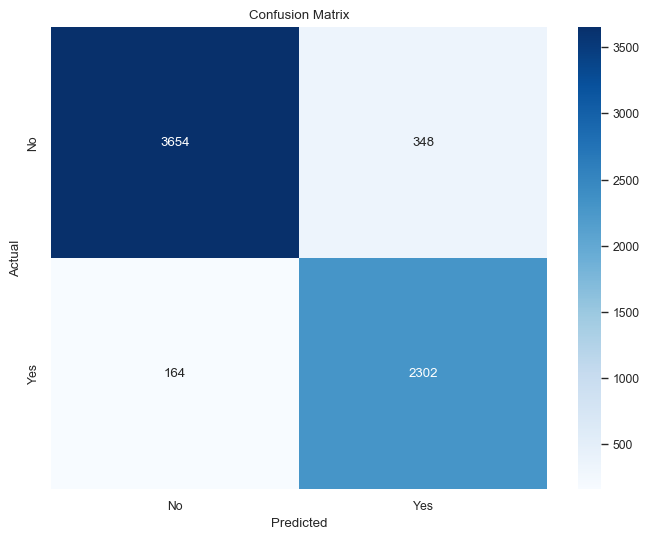

In [450]:
#Plotting the Confusion Matrix
draw_cm( y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

In [451]:
from sklearn.metrics import precision_recall_curve

In [452]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

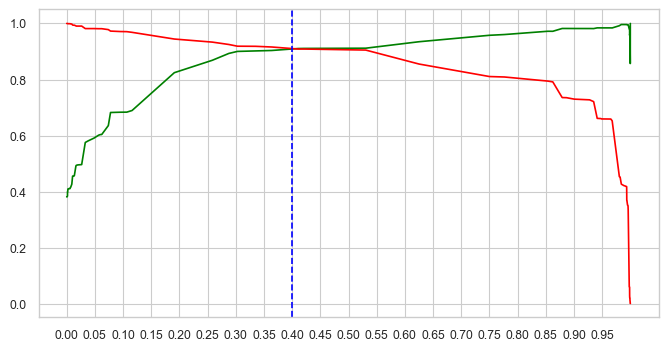

In [453]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.40, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

### Calculate the F1 Score
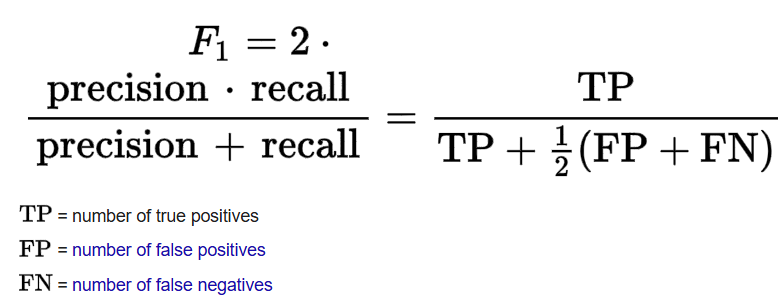

In [454]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8999218139171228

#### Making prediction on Test set

In [455]:
#user scalar function to tranfer to test data set. Here we use only transform rather than fit_transform since we have fit train set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Unknown,How did you hear about X Education_Word Of Mouth,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,Country_Outside India,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,0,0,0.86,0.96,2.61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,0,0,-0.66,-0.89,-1.09,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0

In [456]:
X_test = X_test[col5]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Unknown,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Unknown,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_Worst,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4269,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
2376,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
7766,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9199,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4359,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### Add the costant

In [457]:
X_test_sm = sm.add_constant(X_test)

In [458]:
y_test_pred = res.predict(X_test_sm)

In [459]:
y_test_pred[:10]

4269   0.53
2376   1.00
7766   0.97
9199   0.01
4359   0.97
9186   1.00
1631   0.97
8963   0.97
8007   0.03
5324   1.00
dtype: float64

In [460]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [461]:
# Let's see the head
y_pred_1.head()

,0
4269,0.53
2376,1.00
7766,0.97
9199,0.01
4359,0.97


In [462]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [463]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [464]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [465]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [466]:
y_pred_final.head()

,Converted,LeadID,0
0,1,4269,0.53
1,1,2376,1.00
2,1,7766,0.97
3,0,9199,0.01
4,1,4359,0.97


In [467]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [468]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

In [469]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,4269,1,0.53
1,2376,1,1.00
2,7766,1,0.97
3,9199,0,0.01
4,4359,1,0.97


In [470]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.25 else 0)

In [471]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,4269,1,0.53,1
1,2376,1,1.00,1
2,7766,1,0.97,1
3,9199,0,0.01,0
4,4359,1,0.97,1


In [472]:
y_pred_final.shape

(2772, 4)

In [473]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9224386724386724

In [474]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1519  158]
 [  57 1038]]


In [475]:
!pip install mlxtend

In [476]:
# Let's check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.9224386724386724

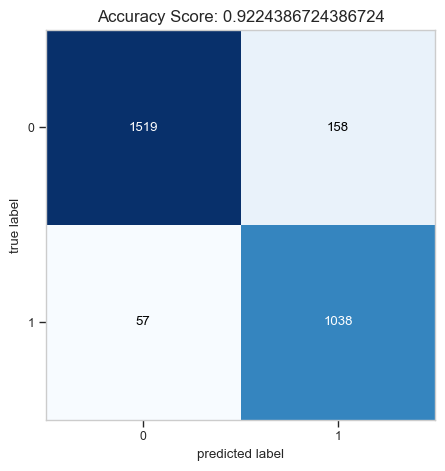

In [477]:
#Confusion matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_test)
all_sample_title = 'Accuracy Score: {0}'.format(acc_score)
plt.title(all_sample_title, size = 12);
# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

In [478]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [479]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.947945205479452

In [480]:
# Let us calculate specificity
TN / float(TN+FP)

0.9057841383422779

In [481]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09421586165772212


In [482]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8678929765886287


In [483]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9638324873096447


In [484]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.8678929765886287

In [485]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.947945205479452

In [486]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.9061545176778699

In [487]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1677
           1       0.87      0.95      0.91      1095

    accuracy                           0.92      2772
   macro avg       0.92      0.93      0.92      2772
weighted avg       0.93      0.92      0.92      2772



In [488]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.77597403 0.88203463 0.89935065 0.89935065 0.9047619  0.91233766
 0.91666667 0.91774892 0.92640693 0.93398268]
0.8968614718614718


### ROC curve on Test data

In [489]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [490]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

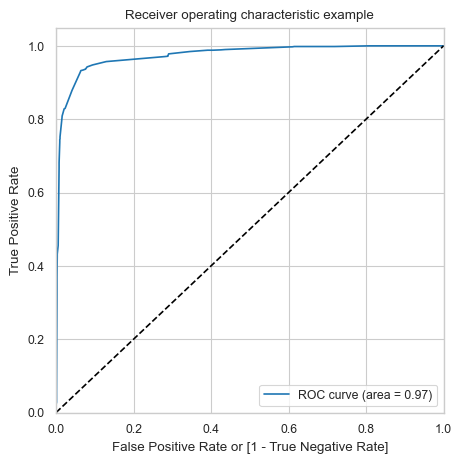

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00119261, 0.00119261, 0.00119261, 0.00238521, 0.00238521,
        0.00238521, 0.00238521, 0.00238521, 0.00238521, 0.00238521,
        0.00298151, 0.00298151, 0.00298151, 0.00536673, 0.00536673,
        0.00775194, 0.00775194, 0.00775194, 0.00954085, 0.00954085,
        0.01013715, 0.01013715, 0.01550388, 0.01550388, 0.0208706 ,
        0.02325581, 0.0411449 , 0.06261181, 0.06380441, 0.07036374,
        0.07453787, 0.07573047, 0.07990459, 0.09421586, 0.12939773,
        0.28085868, 0.28861061, 0.28861061, 0.29039952, 0.34525939,
        0.39117472, 0.39296363, 0.39415623, 0.40488968, 0.42516398,
        0.43649374, 0.60703637, 0.60942159, 0.61478831, 0.62373286,
        0.71317829, 0.71675611, 0.71794872, 0.71914132, 0.80799046,
        0.84675015, 0.85092427, 0.85330948, 0.86463924, 0.86523554,
        0.86702445, 0.87119857, 0.87179487, 0.92

In [491]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

#### Calculating GINI

In [492]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [493]:
auc = auc_val(fpr,tpr)
auc

0.9743652369010762

#### Calculating the Lead Score
###### Lead Score = 100 * ConversionProbability

In [494]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
df_test_pred = y_pred_final.copy()
df_test_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,4269,1,0.53,1
1,2376,1,1.00,1
2,7766,1,0.97,1
3,9199,0,0.01,0
4,4359,1,0.97,1


In [495]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
df_train_pred = y_train_pred_final.copy()
df_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.01,1871,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0.63,6795,1,1,1,1,1,1,1,1,0,0,0,1,63
2,0,0.01,3516,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0.07,8105,0,1,0,0,0,0,0,0,0,0,0,0,7
4,0,0.26,3934,0,1,1,1,0,0,0,0,0,0,0,1,26


In [496]:
# Dropping unnecessary columns from train dataset
df_train_pred = df_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
df_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,1871,0,0.01,0
1,6795,0,0.63,1
2,3516,0,0.01,0
3,8105,0,0.07,0
4,3934,0,0.26,1


In [497]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
df_full_pred = pd.concat([df_train_pred,df_test_pred], ignore_index=True)
df_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,1871,0,0.01,0
1,6795,0,0.63,1
2,3516,0,0.01,0
3,8105,0,0.07,0
4,3934,0,0.26,1


In [498]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(df_train_pred.shape)
print(df_test_pred.shape)
print(df_full_pred.shape)

(6468, 4)
(2772, 4)
(9240, 4)


In [499]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(df_full_pred['LeadID'].unique().tolist())

9240

In [500]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
df_full_pred['Lead_Score'] = df_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
df_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,1871,0,0.01,0,1
1,6795,0,0.63,1,63
2,3516,0,0.01,0,1
3,8105,0,0.07,0,7
4,3934,0,0.26,1,26


In [501]:
# Inspecing the max LeadID
df_full_pred.LeadID.max()

9239

In [502]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
df_full_pred = df_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
df_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.01,0,1
1,0,0.01,0,1
2,1,0.97,1,97
3,0,0.00,0,0
4,1,0.86,1,86


In [509]:
# Let's assign Lead_score for the leads in Test Data Set : 
y_pred_final['lead_score']=(y_pred_final['Conversion_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Conversion_Prob',ascending=False)

,LeadID,Converted,Conversion_Prob,final_predicted,lead_score
157,4830,1,1.00,1,99
915,8412,1,1.00,1,99
1329,4812,1,1.00,1,99
2162,3736,1,1.00,1,99
920,3339,1,1.00,1,99
...,...,...,...,...,...
2309,1590,0,0.00,0,0
232,173,0,0.00,0,0
2196,5627,0,0.00,0,0
1344,8368,0,0.00,0,0


### Feaure importance

In [503]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Source_Welingak Website                     2.82
Last Activity_SMS Sent                           2.15
What is your current occupation_Unknown         -2.54
Tags_Busy                                        1.81
Tags_Closed by Horizzon                          9.30
Tags_Lost to EINS                                9.37
Tags_Ringing                                    -1.97
Tags_Unknown                                     3.22
Tags_Will revert after reading the email         6.11
Tags_invalid number                             -2.25
Tags_switched off                               -2.41
Lead Quality_Worst                              -2.20
Last Notable Activity_Email Link Clicked        -1.34
Last Notable Activity_Modified                  -1.57
Last Notable Activity_Olark Chat Conversation   -1.20
dtype: float64

### Get the relative coefficient

In [504]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Source_Welingak Website                     30.06
Last Activity_SMS Sent                           22.97
What is your current occupation_Unknown         -27.13
Tags_Busy                                        19.27
Tags_Closed by Horizzon                          99.20
Tags_Lost to EINS                               100.00
Tags_Ringing                                    -21.00
Tags_Unknown                                     34.40
Tags_Will revert after reading the email         65.23
Tags_invalid number                             -24.02
Tags_switched off                               -25.75
Lead Quality_Worst                              -23.44
Last Notable Activity_Email Link Clicked        -14.35
Last Notable Activity_Modified                  -16.70
Last Notable Activity_Olark Chat Conversation   -12.77
dtype: float64

In [505]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx
##

Lead Source_Welingak Website                      2
Last Activity_SMS Sent                           10
What is your current occupation_Unknown           9
Tags_Busy                                        11
Tags_Closed by Horizzon                           6
Tags_Lost to EINS                                13
Tags_Ringing                                     12
Tags_Unknown                                     14
Tags_Will revert after reading the email          3
Tags_invalid number                               1
Tags_switched off                                 0
Lead Quality_Worst                                7
Last Notable Activity_Email Link Clicked          8
Last Notable Activity_Modified                    4
Last Notable Activity_Olark Chat Conversation     5
dtype: int64

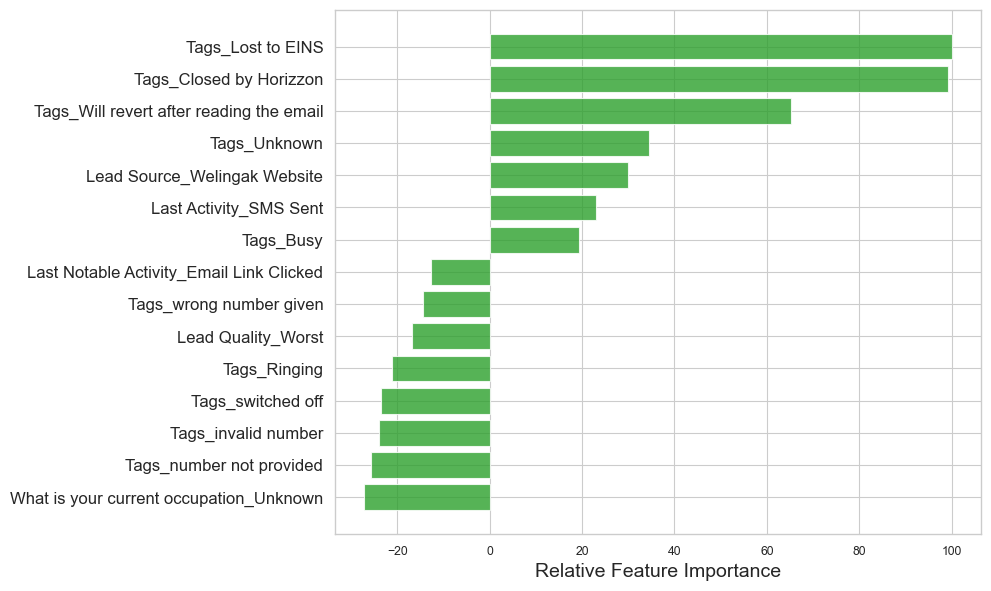

In [506]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:green',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col3].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

In [507]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
5,Tags_Lost to EINS,100.00
4,Tags_Closed by Horizzon,99.20
8,Tags_Will revert after reading the email,65.23


## --------------------------Summary, Conclusion and Recommendations-----------------------------------

### After trying several models, we finally chose a model with the following characteristics:

 - <font color = green>All variables have p-value < `0.05`. </font>
 - <font color = green>All the features have very low VIF values, meaning, there is `hardly any muliticollinearity` among the features. This is also evident from the heat map.</font>
 - <font color = green>The overall accuracy of `0.9316` at a probability threshold of 0.25 on the test dataset is also very acceptable.</font>
    
#### The conversion probability of a lead increases with increase in values of the following features in descending order:

|Features with Positive Coefficient Values|
|-------------|
|Tags_Lost to EINS|
|Tags_Closed by Horizzon|
|Tags_Will revert after reading the email|
|Lead Source_Welingak Website|
|Last Activity_SMS Sent|
|Tags_Busy|


#### The conversion probability of a lead increases with decrease in values of the following features in descending order:

|Features with Negative Coefficient Values|
|----------|
|Tags_switched off|
|Tags_Ringing|
|Last Notable Activity Email link clicked|
|Tags_Wrong number given|
|Lead Quality_Worst|
|Tags_opp hangup|
|Tags_Number not provided|
|What is your current occupation_Unknown|
    
    
#### Top3 Leads:
        Tags_Lost to EINS
        Tags_Closed by Horizzon
        Tags_Will revert after reading the email
